# Imports e download

In [ ]:
!pip install pygwalker

In [31]:
import random
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.figure_factory as ff

# Loading and preparing dataset

In [80]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [81]:
df = df.dropna()

df = df[df.gender != 'Other']

df = df.drop('id', axis = 1)

encoded_df = df.copy()

In [82]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [54]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.00,4908.00,4908.00,4908.00,4908.00,4908.00
mean,42.87,0.09,0.05,105.30,28.89,0.04
std,22.56,0.29,0.22,44.43,7.85,0.20
min,0.08,0.00,0.00,55.12,10.30,0.00
25%,25.00,0.00,0.00,77.07,23.50,0.00
50%,44.00,0.00,0.00,91.68,28.10,0.00
75%,60.00,0.00,0.00,113.50,33.10,0.00
max,82.00,1.00,1.00,271.74,97.60,1.00


In [55]:

round (df.describe(exclude = ['int64', 'float']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,4908,4908,4908,4908,4908
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2897,3204,2810,2490,1852


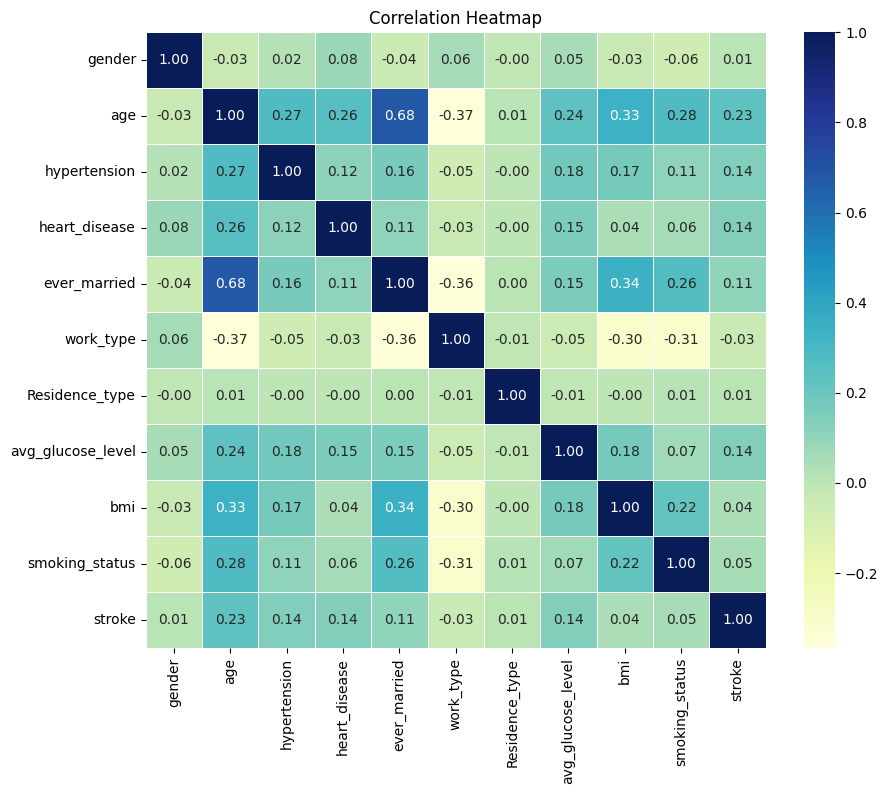

In [72]:
le = LabelEncoder()
encoded_df["gender"] = le.fit_transform(df["gender"])
encoded_df["ever_married"] = le.fit_transform(df["ever_married"])
encoded_df["work_type"] = le.fit_transform(df["work_type"])
encoded_df["Residence_type"] = le.fit_transform(df["Residence_type"])
encoded_df["smoking_status"] = le.fit_transform(df["smoking_status"])


corr_matrix = encoded_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot = True,
            cmap = 'YlGnBu',
            linewidth = .5,
            fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [73]:
fig = px.pie(df, names = 'stroke')
fig.update_layout(title = 'Proportion of Stroke Sample')
fig.show()

In [76]:
fig = px.histogram(df, x = 'age', color = 'gender', marginal = 'box', hover_data = df.columns)
fig.update_layout(title = 'Distribution of Ages and Genders')
fig.show()

In [91]:
stroke_population = df.query('stroke == 1').copy()

male_stroke = px.histogram(x = stroke_population.query('gender == "Male"').age)
male_stroke.update_layout(title = 'Male ages')

male_stroke.show()

In [92]:
male_stroke = px.histogram(x = stroke_population.query('gender == "Female"').age)
male_stroke.update_layout(title = 'Female ages')

male_stroke.show()

In [96]:
fig = px.pie(stroke_population, names = 'gender')
fig.update_layout(title = 'Proportion of Gender in Stroke Sample')
fig.show()